# Analisando Correlação entre WDO - mini dolar e WIN- mini indice


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pro metodo Counter
from collections import Counter
#para shapiro wilk , pearson correlation, linear regression
from scipy import stats




/home/hironu/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
wdo = pd.read_csv('wdo.csv')
win = pd.read_csv('win.csv')

wdo.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,03.04.2020,"5.326,50","5.285,50","5.332,00","5.278,00","1,09M","0,91%"
1,02.04.2020,"5.278,63","5.258,00","5.294,00","5.231,50","1,84M","0,34%"
2,01.04.2020,"5.260,50","5.238,50","5.283,00","5.231,00","1,87M","0,89%"
3,31.03.2020,"5.214,00","5.194,50","5.214,00","5.169,50","1,85M","0,67%"
4,30.03.2020,"5.179,38","5.121,00","5.198,00","5.112,00","1,77M","2,18%"


In [3]:
wdo.drop(['Abertura','Máxima','Mínima','Vol.'],axis=1,inplace=True)
win.drop(['Abertura','Máxima','Mínima','Vol.'],axis=1,inplace=True)

win.head()

,Data,Último,Var%
0,03.04.2020,"68.490,00","-5,03%"
1,02.04.2020,"72.117,00","1,29%"
2,01.04.2020,"71.200,00","-2,18%"
3,31.03.2020,"72.788,00","-2,44%"
4,30.03.2020,"74.612,00","2,14%"


Antes de começar estudar Data Science eu era viciado em excel e como eu estava bem focando em técnicas de trading ,meu foco era tirar insights dos dados para tentar melhorar meu desempenho e entender melhor como funcionava o mercado. Com essa experiencia eu sei que é bem comum ao exportar dados de plataformas de trading que venham linhas faltando. E como nossa intensão é calcular a correlação entre os dois ativo é necessarios que não existam datas faltando. Para isso primariamente vamos calcular o numero de linhas de cada dataframe. 

In [4]:
print('Numero de linhas em Win:',len(win))
print('Numero de linhas em Wdo:',len(wdo))

Numero de linhas em Win: 251
Numero de linhas em Wdo: 251


Agora vamos comparar o inicio dos dois dataframes para checar se as datas iniciam se correspondem:

In [5]:
print(wdo.head()) 
print(win.head())


         Data    Último   Var%
0  03.04.2020  5.326,50  0,91%
1  02.04.2020  5.278,63  0,34%
2  01.04.2020  5.260,50  0,89%
3  31.03.2020  5.214,00  0,67%
4  30.03.2020  5.179,38  2,18%
         Data     Último    Var%
0  03.04.2020  68.490,00  -5,03%
1  02.04.2020  72.117,00   1,29%
2  01.04.2020  71.200,00  -2,18%
3  31.03.2020  72.788,00  -2,44%
4  30.03.2020  74.612,00   2,14%


É possivel também notar que nossos dados estão começando do mais atual e indo pro mais antigo. Queremos reverter esses dados. Para isso , primeiro vamos adcionar uma coluna `ind` em cada dataset e depois ordenaremos em ordem decrescente para que o dado mais antigo se encontre na primeira coluna. 

In [6]:
wdo['indice'] = 0
for i in range(len(wdo)):
    wdo['indice'][i] = i

print(wdo.head())

         Data    Último   Var%  indice
0  03.04.2020  5.326,50  0,91%       0
1  02.04.2020  5.278,63  0,34%       1
2  01.04.2020  5.260,50  0,89%       2
3  31.03.2020  5.214,00  0,67%       3
4  30.03.2020  5.179,38  2,18%       4


/home/hironu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Faremos o mesmo no dataset win:

In [7]:
win['indice'] = 0
for i in range(len(win)):
    win['indice'][i] = i
print(win.tail())

/home/hironu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


           Data     Último    Var%  indice
246  09.04.2019  96.271,00  -1,19%     246
247  08.04.2019  97.426,00   0,17%     247
248  05.04.2019  97.264,00   0,80%     248
249  04.04.2019  96.494,00   1,93%     249
250  03.04.2019  94.665,00  -0,90%     250


Agora vamos usar o metodo `sort_values` para ordenar os dados em foma decrescente baseando se na coluna indice como criterio:

In [8]:
wdo = wdo.sort_values(by ='indice',ascending=False )
win = win.sort_values(by='indice',ascending=False)

print(win.head())
print(wdo.head())

           Data     Último    Var%  indice
250  03.04.2019  94.665,00  -0,90%     250
249  04.04.2019  96.494,00   1,93%     249
248  05.04.2019  97.264,00   0,80%     248
247  08.04.2019  97.426,00   0,17%     247
246  09.04.2019  96.271,00  -1,19%     246
           Data    Último    Var%  indice
250  03.04.2019  3.877,43   0,37%     250
249  04.04.2019  3.858,71  -0,48%     249
248  05.04.2019  3.871,46   0,33%     248
247  08.04.2019  3.852,00  -0,50%     247
246  09.04.2019  3.859,99   0,21%     246


Agora que temos ordenado, podemos excluir a coluna indice, pois não tem utilidade pra nos:

In [9]:
wdo.drop(['indice'],axis=1,inplace=True)
win.drop(['indice'],axis=1,inplace=True)

In [10]:
#remove % , troca virgula por pontos
win['Var%']= win['Var%'].map(lambda a: a.replace('%',''))
win['Var%']= win['Var%'].map(lambda a: a.replace(',','.'))

wdo['Var%']= wdo['Var%'].map(lambda a: a.replace('%',''))
wdo['Var%']= wdo['Var%'].map(lambda a: a.replace(',','.'))

#no win vamos remover o ponto e substuir a virgula por ponto
win['Último'] = win['Último'].map(lambda x: x.replace('.',''))
win['Último'] = win['Último'].map(lambda x: x.replace(',','.'))

#no wdo vamos remover o ponto e substuir a virgula por ponto
wdo['Último'] = wdo['Último'].map(lambda x: x.replace('.',''))
wdo['Último'] = wdo['Último'].map(lambda x: x.replace(',','.'))

#Trasforma str em float
for i in range(len(win['Var%'])):
    
    win['Var%'][i] = float(win['Var%'][i])
    win['Último'][i] = float(win['Último'][i])
    
    wdo['Var%'][i] = float(wdo['Var%'][i])
    wdo['Último'][i] = float(wdo['Último'][i])





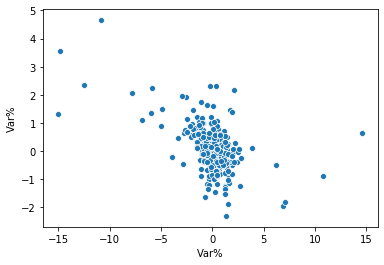

In [11]:
sns.scatterplot(win['Var%'],wdo['Var%'])
plt.savefig("isthismonotonic.jpg")

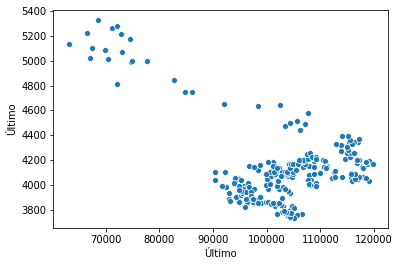

In [36]:
sns.scatterplot(win['Último'],wdo['Último'])

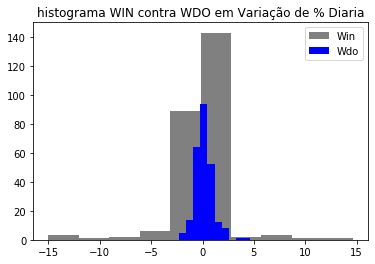

In [12]:

plt.hist(win['Var%'],color='gray',label='Win')
plt.hist(wdo['Var%'],color='blue',label='Wdo')
plt.title('histograma WIN contra WDO em Variação de % Diaria')
plt.legend()
plt.show()

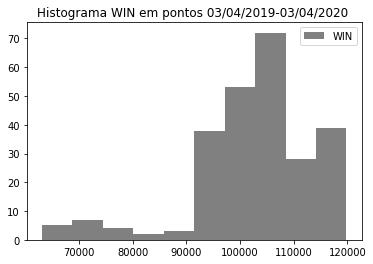

In [13]:

plt.hist(win['Último'],color='gray',label='WIN',bins=10)
plt.title('Histograma WIN em pontos 03/04/2019-03/04/2020 ')
plt.legend()
plt.show()


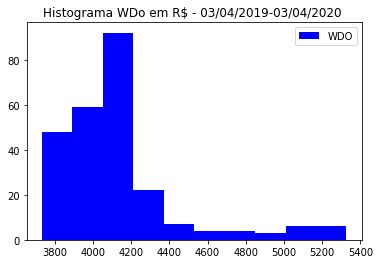

In [14]:

plt.hist(wdo['Último'],color='blue',label='WDO',bins=10)
plt.title('Histograma WDo em R$ - 03/04/2019-03/04/2020 ')
plt.legend()


In [15]:
#O teste de shapiro wilk testa se os dados são normalmente distribuidos

print("teste de Shapiro-Wilk para Var% WIN ",stats.shapiro(win['Var%']))

print("teste de Shapiro-Wilk para Var% WDO ",stats.shapiro(wdo['Var%']))

print("teste de Shapiro-Wilk para Pontos Win ",stats.shapiro(win['Último']))

print("teste de Shapiro-Wilk para Cotação WDO ",stats.shapiro(win['Último']))

teste de Shapiro-Wilk para Var% WIN  (0.7183146476745605, 2.5525381680231412e-20)
teste de Shapiro-Wilk para Var% WDO  (0.9491981863975525, 1.1344484818209821e-07)
teste de Shapiro-Wilk para Pontos Win  (0.8936471939086914, 2.6904865054605542e-12)
teste de Shapiro-Wilk para Cotação WDO  (0.8936471939086914, 2.6904865054605542e-12)


In [16]:
numericalWinCot = np.array(win['Último'])
numericalWinVar = np.array(win['Var%'])

numericalWdoCot = np.array(wdo['Último'])
numericalWdoVar = np.array(wdo['Var%'])

#WIN Pontos
print("Maximo valor Cotação em pontos Win",numericalWinCot.max())
print("Mínimo valor cotação em pontos Win",numericalWinCot.min())
print("Media valor Cotação em pontos Win", numericalWinCot.mean())
print("Mediana valor Cotação em pontos Win", np.median(numericalWinCot))
print("Devio Padrão Cotação em pontos Win",numericalWinCot.std())

winCotModa = Counter(numericalWinCot)
print("Moda valor Cotação em pontos Win",winCotModa.most_common(1))




Maximo valor Cotação em pontos Win 119808.0
Mínimo valor cotação em pontos Win 63099.0
Media valor Cotação em pontos Win 102466.54581673307
Mediana valor Cotação em pontos Win 103837.0
Devio Padrão Cotação em pontos Win 11054.644711887768
Moda valor Cotação em pontos Win [(94665.0, 1)]


In [17]:

#WIN Variação
print("Maximo valor Variação no Win",numericalWinVar.max())
print("Mínimo valor Variação no Win",numericalWinVar.min())
print("Media valor Variaçaõ no Win", numericalWinVar.mean())
print("Mediana valor Variaçao no Win", np.median(numericalWinVar))
print("Devio Padrão Variação no Win",numericalWinVar.std())

winVarModa = Counter(numericalWinVar)
print("Moda valor Cotação em pontos Win",winVarModa.most_common(1))





Maximo valor Variação no Win 14.63
Mínimo valor Variação no Win -15.0
Media valor Variaçaõ no Win -0.09621513944223105
Mediana valor Variaçao no Win 0.1
Devio Padrão Variação no Win 2.6448858449842194
Moda valor Cotação em pontos Win [(-0.17, 4)]


In [18]:
#WDO Cotação
print("Maximo valor Cotação em pontos Wdo",numericalWdoCot.max())
print("Mínimo valor cotação em pontos Wdo",numericalWdoCot.min())
print("Media valor Cotação em pontos Wdo", numericalWdoCot.mean())
print("Mediana valor Cotação em pontos Wdo", np.median(numericalWdoCot))
print("Devio Padrão Cotaão em pontos",numericalWdoCot.std())

wdoCotModa = Counter(numericalWdoCot)
print("Moda valor Cotação em pontos Win",wdoCotModa.most_common(1))


Maximo valor Cotação em pontos Wdo 5326.5
Mínimo valor cotação em pontos Wdo 3733.44
Media valor Cotação em pontos Wdo 4137.8041832669305
Mediana valor Cotação em pontos Wdo 4084.76
Devio Padrão Cotaão em pontos 318.03071200830317
Moda valor Cotação em pontos Win [(4146.95, 2)]


In [19]:

#WDO Variação
print("Maximo valor variação no  Wdo",numericalWdoVar.max())
print("Mínimo valor variação no Wdo",numericalWdoVar.min())
print("Media valor variação no Wdo", numericalWdoVar.mean())
print("Mediana valor variaçao no Wdo", np.median(numericalWdoVar))
print("Devio Padrão Variação no Wdo",numericalWdoVar.std())

wdoVarModa = Counter(numericalWdoVar)
print("Moda valor Cotação em pontos Win",wdoVarModa.most_common(1))

Maximo valor variação no  Wdo 4.67
Mínimo valor variação no Wdo -2.32
Media valor variação no Wdo 0.13187250996015937
Mediana valor variaçao no Wdo 0.13
Devio Padrão Variação no Wdo 0.8594740815718066
Moda valor Cotação em pontos Win [(0.13, 6)]


In [20]:
#Variancia da Cotação do Win entre 3/4/2019 - 3/4/2020
WinCotVariance = np.sum(np.square([x_winCot - numericalWinCot.mean() for x_winCot in numericalWinCot]))/len(numericalWinCot)

#Variancia da Variação do Win entre 3/4/2019 - 3/4/2020
WinVarVariance = np.sum(np.square([x_winVar - numericalWinVar.mean() for x_winVar in numericalWinVar]))/len(numericalWinCot)

#Variancia da Cotação do Wdo entre 3/4/2019 - 3/4/2020
WdoCotVariance = np.sum(np.square([x_wdoCot - numericalWdoCot.mean() for x_wdoCot in numericalWdoCot]))/len(numericalWdoCot)

#Variancia da Variação do Wdo entre 3/4/2019 - 3/4/2020
WdoVarVariance = np.sum(np.square([x_wdoVar - numericalWdoVar.mean() for x_wdoVar in numericalWdoVar]))/len(numericalWdoVar)

print(WinCotVariance)
print(WinVarVariance)
print(WdoCotVariance)
print(WdoVarVariance)


122205169.70606814
6.9954211329978895
101143.53378050827
0.7386956968937001


Acima calculei a variação escrevendo todas os detalhes, mas graças a numpy é possivel calcular a variancia como descrito abaixo

In [21]:
print(np.var(numericalWinCot))
print(np.var(numericalWinVar))
print(np.var(numericalWdoCot))
print(np.var(numericalWdoVar))

122205169.70606817
6.9954211329978895
101143.53378050825
0.7386956968937004


In [22]:
print("Covariancia entre IND Var% e WDO Var", np.cov(numericalWinVar.astype(float),numericalWdoVar.astype(float)))
print("Covariancia entre IND Cot e WDO Cot", np.cov(numericalWinCot.astype(float),numericalWdoCot.astype(float)))

Covariancia entre IND Var% e WDO Var [[ 7.02340282 -1.22589352]
 [-1.22589352  0.74165048]]
Covariancia entre IND Cot e WDO Cot [[ 1.22693990e+08 -1.75892549e+06]
 [-1.75892549e+06  1.01548108e+05]]


In [23]:
np.sum(np.array([x_a - numericalWinVar.mean() for x_a in numericalWinVar]) * np.array([x_b - numericalWdoVar.mean() for x_b in numericalWdoVar]))/len(numericalWdoVar)


-1.2210094776273392

Podemos Calcular a amplitude total:

In [24]:
print("Amplitude total em pontos", numericalWinCot.max() - numericalWinCot.min())
print("Amplitude total em reais",numericalWdoCot.max() - numericalWdoCot.min())

print("\nAmplitude total em % da Variação do Win", numericalWinVar.max()-numericalWinVar.min())
print("Amplitudo total em % da Variação do Wdo", numericalWdoVar.max()- numericalWdoVar.min())

Amplitude total em pontos 56709.0
Amplitude total em reais 1593.06

Amplitude total em % da Variação do Win 29.630000000000003
Amplitudo total em % da Variação do Wdo 6.99


## Corrrelação mostra a interdependencia entre 2 variaveis


### Pearson Correlation 

In [25]:
print("CORRELAÇÂO DE PEARSON\n 1-Correlaão , 2-P-Value")
print("Correlação cotação WIn e Wdo",stats.pearsonr(numericalWinCot,numericalWdoCot))
print("Correlação de Variação % Win e Wdo ",stats.pearsonr(numericalWinVar,numericalWdoVar))

CORRELAÇÂO DE PEARSON
 1-Correlaão , 2-P-Value
Correlação cotação WIn e Wdo (-0.49831031849356316, 3.693291525012465e-17)
Correlação de Variação % Win e Wdo  (-0.5371298870220553, 3.666787076126128e-20)


###  Spearman Correlation

In [26]:
print("Correlação spearman Cot Win e Wdo",stats.spearmanr(numericalWinCot,numericalWdoCot))
print("Correlação spearman Var% Win e Wdo",stats.spearmanr(numericalWinVar,numericalWdoVar))

Correlação spearman Cot Win e Wdo SpearmanrResult(correlation=0.19516110703113743, pvalue=0.0018936454364211187)
Correlação spearman Var% Win e Wdo SpearmanrResult(correlation=-0.47216537261659475, pvalue=2.426924587053076e-15)


# Regressão Linear

In [32]:
regressor = stats.linregress(numericalWinVar.astype(float),numericalWdoVar.astype(float))
print(regressor)


LinregressResult(slope=-0.17454409883455804, intercept=0.11507872515197377, rvalue=-0.5371298870220553, pvalue=3.666787076125386e-20, stderr=0.017370448500715303)
